#Case study on Python Flask
Case Study on Python Flask: Using the given dataset, create a web application to take feature inputs from the user in a web page and print whether a person will purchase the product or not.



Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load and display data

In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

Gender is almost equally distributed .No effect on purchase. So eliminate gender column and userid.

Take Age ,Estimated salary and Purchased columns for making model

In [ ]:
df = data.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Check null values

In [ ]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No null values

Check outliers

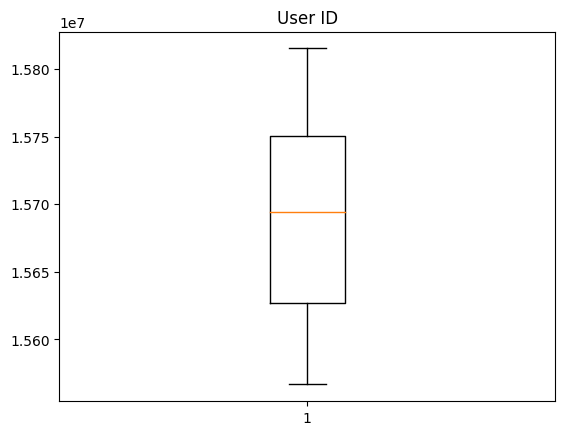

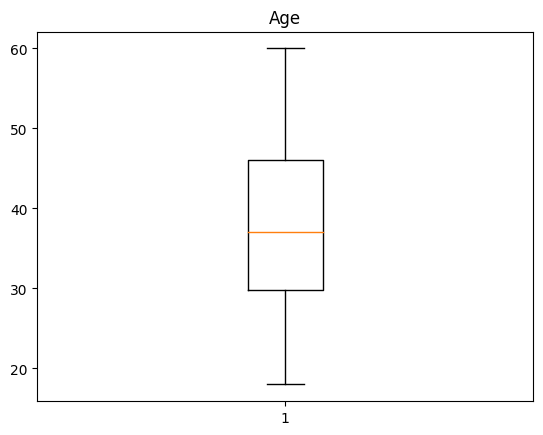

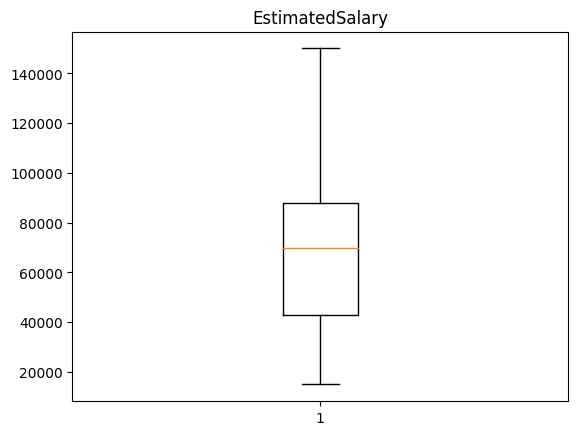

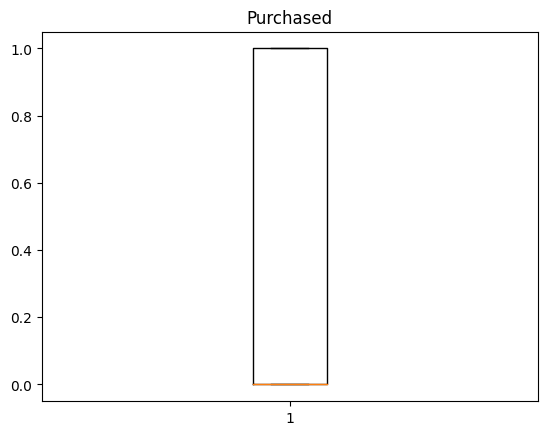

In [ ]:
num_columns=data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


There is no outliers.

Split the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.25,
                                                    random_state=42)

x_train.shape, x_test.shape


((300, 2), (100, 2))

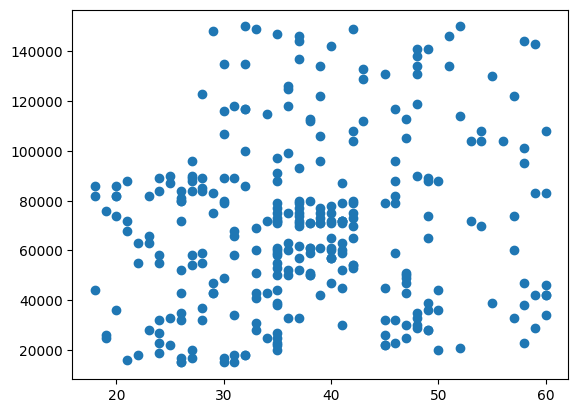

In [ ]:
plt.scatter(x_train['Age'], x_train['EstimatedSalary'])


#Scaling

Do Standard Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


#1.Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [ ]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)


LogisticRegression()

In [ ]:
y_pred_log = lr.predict(x_test)
y_pred_log_scaled = lr_scaled.predict(x_test_scaled)


In [ ]:
#To check accuracy
from sklearn.metrics import accuracy_score


In [ ]:
print("Actual",accuracy_score(y_test,y_pred_log))
print("Scaled",accuracy_score(y_test,y_pred_log_scaled))

log = accuracy_score(y_test,y_pred_log)
log_sc = accuracy_score(y_test,y_pred_log_scaled)

Actual 0.63
Scaled 0.86


#2.KNN Model

Text(0, 0.5, 'accuracy')

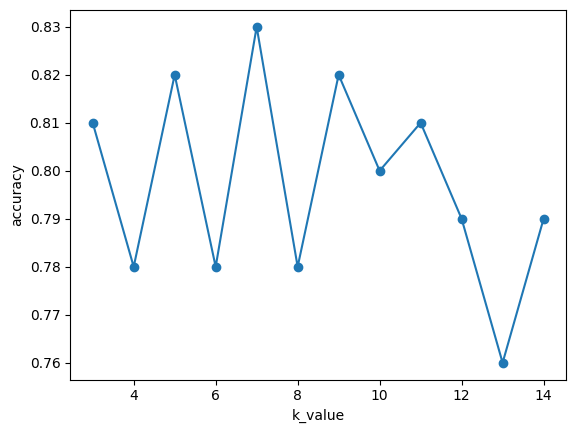

In [ ]:
#For data without scaling
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')


Text(0, 0.5, 'accuracy')

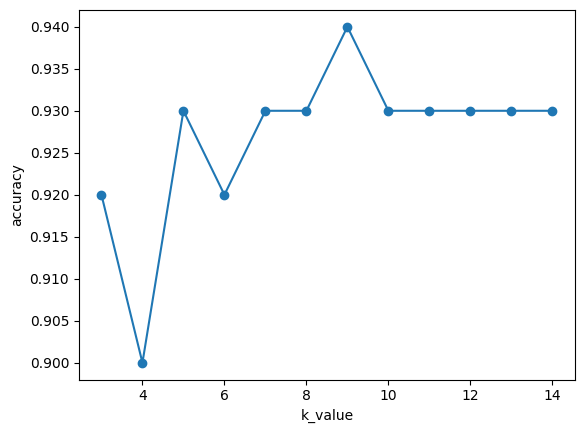

In [ ]:
#For scaled data
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier2 = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier2.fit(x_train_scaled,y_train)
  y_pred_knn_sc = classifier2.predict(x_test_scaled)
  accuracy2= accuracy_score(y_test,y_pred_knn_sc)
  metric_k.append(accuracy2)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)#for data without scaling
classifier_sc = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)#for scaled data
knn = classifier.fit(x_train.values,y_train)
knn_scaled = classifier_sc.fit(x_train_scaled,y_train)

y_pred_knn = knn.predict(x_test.values)
y_pred_knn_scaled = knn_scaled.predict(x_test_scaled)


In [ ]:
print("Actual",accuracy_score(y_test,y_pred_knn))
print("Scaled",accuracy_score(y_test,y_pred_knn_scaled))
knn = accuracy_score(y_test,y_pred_knn)
knn_sc = accuracy_score(y_test,y_pred_knn_scaled)


Actual 0.83
Scaled 0.94


#3.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()


In [ ]:
dt.fit(x_train,y_train) #for data without scaling
dt_scaled.fit(x_train_scaled,y_train)#for scaled data


DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(x_test)
y_pred_dt_scaled = dt_scaled.predict(x_test_scaled)


In [ ]:
print("Actual",accuracy_score(y_test,y_pred_dt))
print("Scaled",accuracy_score(y_test,y_pred_dt_scaled))
dt_acc = accuracy_score(y_test,y_pred_dt)
dt_sc = accuracy_score(y_test,y_pred_dt_scaled)

Actual 0.85
Scaled 0.84


# 4.SVM

In [ ]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='linear')
sv_cl2 = SVC(kernel='linear')
sv = sv_cl.fit(x_train.values,y_train)#for data without scaling
sv_scaled = sv_cl2.fit(x_train_scaled,y_train)#for scaled data

In [ ]:
y_pred_svm = sv.predict(x_test.values)
y_pred_svm_scaled = sv_scaled.predict(x_test_scaled)

In [ ]:
print("Actual",accuracy_score(y_test,y_pred_svm))
print("Scaled",accuracy_score(y_test,y_pred_svm_scaled))
svm = accuracy_score(y_test,y_pred_svm)
svm_sc = accuracy_score(y_test,y_pred_svm_scaled)

Actual 0.86
Scaled 0.86


#5.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 =RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy')
rf_clf2 =RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy')

rf = rf_clf1.fit(x_train.values,y_train)#for data without scaling
rf_scaled = rf_clf2.fit(x_train_scaled,y_train)#for scaled data

In [ ]:
y_pred_rf = rf.predict(x_test.values)
y_pred_rf_scaled = rf_scaled.predict(x_test_scaled)


In [ ]:
print("Actual",accuracy_score(y_test,y_pred_rf))
print("Scaled",accuracy_score(y_test,y_pred_rf_scaled))
rf_acc = accuracy_score(y_test,y_pred_rf)
rf_sc = accuracy_score(y_test,y_pred_rf_scaled)

Actual 0.91
Scaled 0.89


In [ ]:
result = pd.DataFrame({'Model': ['Logistic Regression','KNN Model','SVM Model','Decision tree','Random forest'], 'Accuracy':[log,knn,svm,dt_acc,rf_acc], 'Accuracy (Scaled)':[log_sc,knn_sc,svm_sc,dt_sc,rf_sc]})
result

,Model,Accuracy,Accuracy (Scaled)
0,Logistic Regression,0.63,0.86
1,KNN Model,0.83,0.94
2,SVM Model,0.86,0.86
3,Decision tree,0.85,0.84
4,Random forest,0.91,0.89


Accuracy of **KNN Model** using scaled data is high 0.94. Accuracy of Random forest model is also high 0.91.


Accuracy of KNN model of scaled data and Random forest model is high .So we decide to cross validate these models.

In [ ]:
x=df.drop('Purchased', axis=1)
y=df['Purchased']

#Cross Validation

KFold cross validation

In [ ]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10) #no of folds
from sklearn.model_selection import cross_val_score
cv_score_knn=cross_val_score(knn_scaled,x,y,cv=kfold_validator)
cv_score_rf=cross_val_score(rf,x,y,cv=kfold_validator)
cv_score_rf_sc=cross_val_score(rf_scaled,x,y,cv=kfold_validator)

cv_scores = pd.DataFrame({'Model':['KNN Model','Random forest','Random forest scaled'],'CV mean score':[cv_score_knn.mean(),cv_score_rf.mean(),cv_score_rf_sc.mean()]})

cv_scores


,Model,CV mean score
0,KNN Model,0.7550
1,Random forest,0.8900
2,Random forest scaled,0.8875


CV score of Random forest model without scaling is high.

Stratified KFold cross validation

In [ ]:
#stratified cv
from sklearn.model_selection import StratifiedKFold
stratified_cv =StratifiedKFold(n_splits=10)
cv_score_sr_knn=cross_val_score(knn_scaled,x,y,cv=stratified_cv)
cv_score_sr_rf=cross_val_score(rf,x,y,cv=stratified_cv)
cv_score_sr_rf_sc=cross_val_score(rf_scaled,x,y,cv=stratified_cv)


In [ ]:
cv_scores_sr = pd.DataFrame({'Model':['KNN Model','Random forest','Random forest scaled'],'CV mean score of Stratified kfold':[cv_score_sr_knn.mean(),cv_score_sr_rf.mean(),cv_score_sr_rf_sc.mean()]})

cv_scores_sr


,Model,CV mean score of Stratified kfold
0,KNN Model,0.7850
1,Random forest,0.8775
2,Random forest scaled,0.8725


#Conclusion:
In comparing the mean CV scores of the Scaled KNN, Random Forest, and Random Forest scaled models, we observe that the **Random Forest model without scaling** yields the highest score. Therefore, we decide to select the Random Forest model and pickle it for integration into the Flask application.

#Pickle Random forest model

In [ ]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

Check our model with our csv data

In [ ]:
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict([[19,19000]])

array([0])

In [ ]:
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict([[32,150000]])

array([1])